# Metody Rozpoznawania Obrazów i Podstawy Uczenia Maszynowego

# Nr tematu projektu: 1



### Autorzy: Arkadiusz Kraus, Filip Ślazyk
### Grupa laboratoryjna: poniedziałek 14:40 A

### 1. Zbiór danych: TNG, ok 18000 próbek, 20 klas. Wykorzystujemy gotowe dane reprezentujące tekst blogów w postaci wektorów (dostarcza prowadzący)


In [1]:
import numpy as np
import pandas as pd

In [2]:
TNG_prefix = './TNG'

#ng20 has about 5k rows
#ng20_all has about 19k rows
TNG_name = 'ng20_all.csv'
TNG_path = '{}/{}'.format(TNG_prefix, TNG_name)

In [3]:
TNG = pd.read_csv(TNG_path, header=None)
TNG

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,0.0,15.728111,9.099586,0.259395,5.156905,0.000000,0.0,0.000000,7.731676,0.000000,...,11.612481,0.000000,3.256385,0.0,0.000000,7.129995,0.000000,3.373063,0.0,9
1,0.0,0.000000,0.000000,0.000000,0.000000,14.229717,0.0,0.000000,0.000000,0.000000,...,0.000000,2.213775,0.000000,0.0,0.000000,0.000000,2.523506,2.307943,0.0,4
2,0.0,0.000000,0.000000,72.029411,0.000000,0.000000,0.0,0.000000,0.000000,56.773968,...,0.000000,0.000000,0.000000,0.0,0.000000,136.649582,0.000000,0.000000,0.0,11
3,0.0,0.000000,0.000000,0.000000,0.000000,14.833830,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.940317,0.000000,0.0,4
4,0.0,0.000000,0.000000,0.000000,4.875045,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,6.780793,0.000000,0.000000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,0.0,0.000000,0.248722,0.000000,0.000000,3.898138,0.0,2.554687,0.000000,4.410306,...,0.000000,0.000000,0.000000,0.0,0.000000,0.785907,0.000000,0.000000,0.0,12
18842,0.0,0.000000,0.000000,0.000000,0.320675,0.000000,0.0,3.230011,0.000000,0.000000,...,0.000000,1.078652,0.000000,0.0,2.671853,0.000000,0.113560,0.000000,0.0,8
18843,0.0,0.000000,0.000000,0.000000,0.000000,0.860070,0.0,1.224586,0.000000,0.457255,...,0.000000,0.000000,0.000000,0.0,0.303810,0.000000,0.000000,0.000000,0.0,4
18844,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,8.226898,0.000000,0.0,5.754258,0.000000,0.000000,0.000000,0.0,6


In [4]:
y = np.array(TNG[128])
X = np.array(TNG[range(0,128)])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Celem projektu jest porównanie dwóch klasyfikatorów: klasyfikatora AdaBoost użytego dla pełnych danych oraz sieci neuronowej MLP.  

(mamy użyć "kilku" warstw MLP, np. 5)

# MLP

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [41]:
#mlp = MLPClassifier(hidden_layer_sizes=(74,74,74,74,))
mlp = MLPClassifier(hidden_layer_sizes=(128,128,128,128,128,), max_iter=400,)

In [29]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128, 128, 128, 128, 128),
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

In [30]:
y_predicted = mlp.predict(X_test)

In [31]:
accuracy_score(y_test, y_predicted)

0.9294429708222812

# AdaBoost

In [103]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [33]:
estimators = [None, # None in adaboost uses DecisionTreeClassifier(max_depth=1)
              SVC(probability=True), # Do you have so much time?
              RandomForestClassifier(n_estimators=20, n_jobs=4) # Best one
             ] 
ada = AdaBoostClassifier(n_estimators=20, base_estimator=estimators[2])

In [34]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [35]:
y_predicted = ada.predict(X_test)

In [36]:
accuracy_score(y_test, y_predicted)

0.9374005305039788

### 3. Ocenić moc obu (robustness) klasyfikatorów na ich jakość w zależności od stopnia zaszumienia wejściowych danych.


“moc na ich jakość” - jak należy to rozumieć? Jak mamy “zaszumić” dane (jakiej miary użyć)?
mamy pozamieniać 10, 20 , 30% etykiet
robustness to własnie odporność na te zmiany, accuracy jako miara ma byc


In [42]:
import random

In [43]:
def noised_label(l, rng_min=0, rng_max=19):
    nl = random.randint(rng_min, rng_max)
    while nl == l:
        nl = random.randint(rng_min, rng_max)
    return nl
    
def noise(X, y, noise_size):
    if noise_size == 0:
        return X, y
    X_pure, X_to_noise, y_pure, y_to_noise = train_test_split(X, y, 
                                                              test_size=noise_size, random_state=42)
    noised = [ noised_label(y) for y in y_to_noise ] 
    X_noised = np.concatenate((X_pure, X_to_noise), axis=0)
    y_noised = np.concatenate((y_pure, noised), axis=0)
    y_shuffled = np.concatenate((y_pure, y_to_noise), axis=0)
    print("Simple check for noise_size {}: {}".format(noise_size, accuracy_score(y_shuffled, y_noised)))
    return X_noised, y_noised

In [44]:
def get_accuracy(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    return accuracy_score(y_predicted, y_test)
    
def compare(clf1, clf2, X_train, X_test, y_train, y_test):
    acc1 = get_accuracy(clf1, X_train, X_test, y_train, y_test)
    acc2 = get_accuracy(clf2, X_train, X_test, y_train, y_test)
    return acc1, acc2

In [45]:
noise_sizes = [0, 0.1, 0.2, 0.3]
ada_scores = []
mlp_scores = []
for noise_size in noise_sizes:
#     X_train_noised, y_train_noised = noise(X_train[:1000], y_train[:1000], noise_size)
    X_train_noised, y_train_noised = noise(X_train, y_train, noise_size)
    ada_acc, mlp_acc = compare(ada, mlp, X_train_noised, X_test, y_train_noised, y_test)
    ada_scores.append(ada_acc)
    mlp_scores.append(mlp_acc)

Simple check for noise_size 0.1: 0.8999734677633324
Simple check for noise_size 0.2: 0.7999469355266648
Simple check for noise_size 0.3: 0.6999867338816662


In [46]:
df = pd.DataFrame()
df["noise size"] = noise_sizes
df["ada boost accuracy"] = ada_scores
df["mlp accuracy"] = mlp_scores
df

,noise size,ada boost accuracy,mlp accuracy
0,0.0,0.935279,0.928117
1,0.1,0.935809,0.868170
2,0.2,0.933687,0.837401
3,0.3,0.931034,0.732626


### 4. Jak zmieni się jakość klasyfikatorów po użyciu transformacji PCA.

Czy PCA ma być ND->ND czy ND -> N’D (N’<<N)?
zrobić n-n, a potem n na mniej nie może być zbyt mała 30 okej


In [47]:
from sklearn.decomposition import PCA

In [48]:
def compare_pca(clf1, clf2, X_train, X_test, y_train, y_test, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    X_train_pcaed = pca.transform(X_train)
    X_test_pcaed = pca.transform(X_test)
    return compare(clf1, clf2, X_train_pcaed, X_test_pcaed, y_train, y_test)

In [49]:
ns = [X_train.shape[1], 30]
ada_scores = []
mlp_scores = []
for n in ns:
    ada_acc, mlp_acc = compare_pca(ada, mlp, X_train, X_test, y_train, y_test, n)
    ada_scores.append(ada_acc)
    mlp_scores.append(mlp_acc)

In [50]:
df = pd.DataFrame()
df["n_components"] = ns
df["ada boost accuracy"] = ada_scores
df["mlp accuracy"] = mlp_scores
df

,n_components,ada boost accuracy,mlp accuracy
0,128,0.931034,0.931300
1,30,0.936870,0.937135


### 5. Wyniki jakości klasyfikatorów oceniać na bazie krzyżowej-walidacji, (accuracy - Loss- błąd, Krzywa ROC, Precision-Recall, (pola pod krzywymi) F1).

Loss tylko w odniesieniu do MLP, a error do AdaBoost? Log Loss?
Jak zrobić ROC  (weighted?), Precision-Recall dla wielu klas? micro-averaged?
Upewnić się - F1 jako score, a nie krzywa?

Dla wielu klas możemy też narysować, on chce “uzupełnić lukę w wiedzy” czy jakoś tak


In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

In [90]:
scoring_metrics = ['accuracy', 
                   'neg_log_loss',
                   # error ?
                   'roc_auc_ovr_weighted',
                   #'average_precision', # precision-recall auc - only for binary classification
                   'f1_weighted',
                  ]

In [91]:
def evaluate_cv(X_train=X_train, y_train=y_train, scoring_metrics=scoring_metrics, n_jobs=-1):
    mlp_scores = []
    ada_scores = []
     
    for scoring in scoring_metrics:
        mlp_results = cross_val_score(mlp, X_train, y_train, cv=5, scoring=scoring, n_jobs=n_jobs)
        mlp_scores.append(np.mean(mlp_results))
        ada_results = cross_val_score(ada, X_train, y_train, cv=5, scoring=scoring, n_jobs=n_jobs)
        ada_scores.append(np.mean(ada_results))
    
#     mlp_bin = OneVsRestClassifier(mlp)
#     ada_bin = OneVsRestClassifier(ada)    
#     mlp_results = cross_val_score(mlp_bin, X_train, y_train, cv=5, scoring='average_precision', n_jobs=n_jobs)
#     mlp_scores.append(np.mean(mlp_results))
#     ada_results = cross_val_score(ada_bin, X_train, y_train, cv=5, scoring='average_precision', n_jobs=n_jobs)
#     ada_scores.append(np.mean(ada_results))    
    
    df = pd.DataFrame()
    df['metric'] = scoring_metrics
    df['MLP'] = mlp_scores
    df['AdaBoost'] = ada_scores
    
    return df


In [92]:
evaluate_cv(X_train[:300], y_train[:300])

,metric,MLP,AdaBoost
0,accuracy,0.923333,0.916667
1,neg_log_loss,-0.517207,-0.939845
2,roc_auc_ovr_weighted,0.995514,0.990350
3,f1_weighted,0.925042,0.902667


## Precision-recall curve, ROC

In [202]:
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, log_loss
from sklearn.preprocessing import label_binarize

In [203]:
n_classes=20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
mlp = MLPClassifier(hidden_layer_sizes=(128,128,128,128,128,), max_iter=400,)

In [205]:
ada = AdaBoostClassifier(n_estimators=20, base_estimator=RandomForestClassifier(n_estimators=20, n_jobs=-1))

In [206]:
# X_train = X_train[:300]
# y_train = label_binarize(y_train[:300], classes=[x for x in range(n_classes)])
# X_test = X_test[:300]
# y_test = label_binarize(y_test[:300], classes=[x for x in range(n_classes)])

X_train = X_train[:]
y_train = label_binarize(y_train[:], classes=[x for x in range(n_classes)])
X_test = X_test[:]
y_test = label_binarize(y_test[:], classes=[x for x in range(n_classes)])

In [207]:
clf = OneVsRestClassifier(mlp, n_jobs=-1)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)

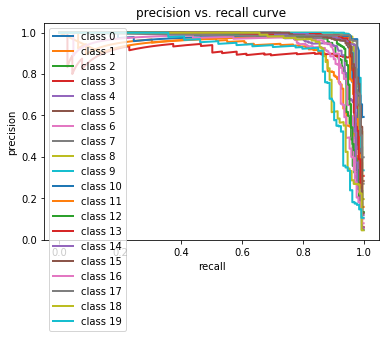

In [208]:
# MLP precision-recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

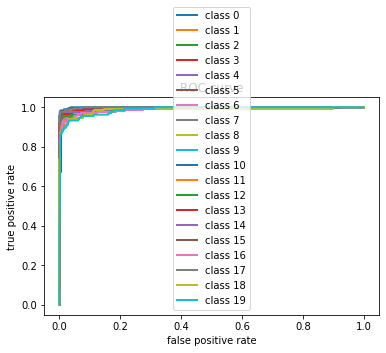

In [209]:
# MLP ROC curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

In [210]:
clf = OneVsRestClassifier(ada, n_jobs=-1)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)

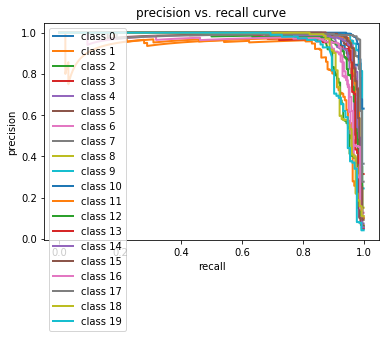

In [211]:
# AdaBoost precision-recall curve

precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

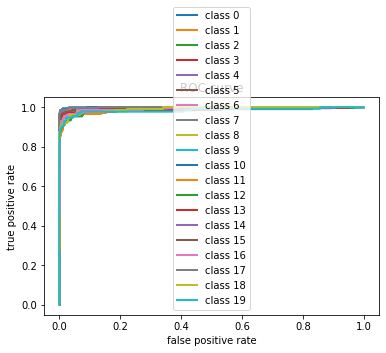

In [212]:
# AdaBoost ROC curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

### 6. Dokonać porównania wyników tzn: accuracy i loss. Jakość klasyfikatorów porównywać dla 3 budżetów czasowych T1, T2, T3 (krótki, średni i długi).


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
estimators = [None, # None in adaboost uses DecisionTreeClassifier(max_depth=1)
              SVC(probability=True), # Do you have so much time?
              RandomForestClassifier(n_estimators=20, n_jobs=4) # Best one
             ] 

In [143]:
mlp_budgets = [50, 100, 200]
ada_budgets = [5, 10, 20]

In [154]:
def evaluate_budgets():
    mlp_acc = []
    mlp_loss = []
    ada_acc = []
    ada_loss = []
    
    classes = [x for x in range(n_classes)]
    
    for budget in mlp_budgets:
        mlp = MLPClassifier(hidden_layer_sizes=(128,128,128,128,128,), max_iter=budget)
        mlp.fit(X_train, y_train)
        y_predicted = mlp.predict(X_test)
        y_prob = mlp.predict_proba(X_test)
        mlp_acc.append(accuracy_score(y_test, y_predicted))
        mlp_loss.append(log_loss(y_test, y_prob))

    for budget in ada_budgets:
        ada = AdaBoostClassifier(n_estimators=budget, base_estimator=estimators[2])
        ada.fit(X_train, y_train)
        y_predicted = ada.predict(X_test)
        y_prob = ada.predict_proba(X_test)
        ada_acc.append(accuracy_score(y_test, y_predicted))
        ada_loss.append(log_loss(y_test, y_prob))         
    
    df = pd.DataFrame()
    df['budget'] = ['short', 'medium', 'long']
    df['MLP accuracy'] = mlp_acc
    df['MLP log loss'] = mlp_loss
    df['AdaBoost accuracy'] = ada_acc
    df['AdaBoost log loss'] = ada_loss
    
    return df

In [155]:
evaluate_budgets()

/usr/local/anaconda3/envs/ml-lab/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/anaconda3/envs/ml-lab/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,budget,MLP accuracy,MLP log loss,AdaBoost accuracy,AdaBoost log loss
0,short,0.935809,0.357352,0.936605,0.629040
1,medium,0.928382,0.560752,0.936605,0.465267
2,long,0.927321,0.594785,0.936340,0.362758


### 7. Należy dokonać badań:
### a. 5,6. (3.5)
### b. 3,4 (4.0)
### c. Znaleźć zestaw cech, który jest głównie odpowiedzialny za przynależność do odpowiednich klas. (5.0)

Użyć RFE? Albo RandomForest do określenia ranków cech?  Tak, możemy RandomForest


In [187]:
ada = AdaBoostClassifier(n_estimators=20, base_estimator=RandomForestClassifier(n_estimators=50, n_jobs=-1))

In [188]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [189]:
ada.feature_importances_

/usr/local/anaconda3/envs/ml-lab/lib/python3.7/site-packages/sklearn/tree/_classes.py:578: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

0.9360742705570292

In [164]:
clf = RandomForestClassifier(n_estimators=20, n_jobs=-1)

In [165]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [177]:
importances = [(f_no, importance)  for (f_no, importance) in enumerate(clf.feature_importances_)]

In [181]:
importances.sort(key=lambda x: -x[1])

In [183]:
importances[:20]

[(32, 0.0233871394569857),
 (56, 0.020319405048144255),
 (71, 0.01976038323134153),
 (15, 0.019610421492664766),
 (18, 0.019595568313208304),
 (97, 0.018089061859414814),
 (112, 0.017840525884859137),
 (78, 0.017495506217595807),
 (114, 0.017063869312689484),
 (40, 0.016827593490835246),
 (116, 0.016723757169138227),
 (51, 0.01671409119683644),
 (60, 0.016565196049268687),
 (16, 0.016494263028860458),
 (55, 0.0161946583593352),
 (99, 0.015678468549301914),
 (27, 0.01558185647368765),
 (81, 0.01502850388874204),
 (110, 0.014740974358385565),
 (33, 0.014626048804849277)]

### 8. Należy sporządzić raport z projektu.

Raport może mieć więcej niż 2 strony.
Zalecenia do oceny jakości klasyfikacji: najpierw dobrze wykonać walidację krzyżową ma zbiorze treningowym, a dopiero potem holdout.


